# Q Learning on Frozen Lake

This exercise will challenge you to solve the Reinforcement Learning problem in the Frozen Lake environment, it seems quite simple but watch out! It may have a few suprises in store!

Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake.

## Action Space
The agent takes a 1-element vector for actions. The action space is (dir), where dir decides direction to move in which can be:

0: LEFT

1: DOWN

2: RIGHT

3: UP

## Observation Space
The observation is a value representing the agent’s current position as current_row * nrows + current_col (where both the row and col start at 0). For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number of possible observations is dependent on the size of the map. For example, the 4x4 map has 16 possible observations.

## Rewards
Reward schedule:

Reach goal(G): +1

Reach hole(H): 0 (Terminates the episode)

Reach frozen(F): 0

1. Let's start by installing some libraries

In [1]:
!pip3 install cmake
!pip3 install scipy
!pip3 install gym[toy_text]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 31.1 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2


2. Use `gym` to set up a frozen Lake environment with dimension 4x4 that is not slippery. You may learn how to do that [here](https://www.gymlibrary.ml/environments/toy_text/frozen_lake/). Reset the environment and display the first state using matplotlib and the `.render(mode="rgb_array")` method.

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


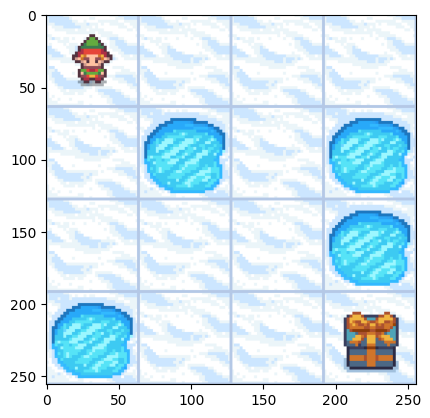

In [2]:
import gym
import matplotlib.pyplot as plt
import os
import numpy as np
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("FrozenLake-v1", desc=None,map_name="4x4", is_slippery=False, render_mode="rgb_array").env
env.reset()
plt.imshow(np.squeeze(env.render()))

3. Reset the environment and look what happens when taking action `0`.

In [4]:
env.reset()

0

In [6]:
env.step(0)

(0, 0.0, False, {'prob': 1.0})

4. How do you interpret the resulting values?

5. Print the size of the action space and the observation space using attributes of the environment object.

In [ ]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(4)
State Space Discrete(16)


6. Setup the Q Table (remember it should represent the values of each state action pairs), initialize all values to zero

In [7]:
import numpy as np
#q_table = np.random.rand(env.observation_space.n, env.action_space.n)
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

7. Run a Q-Learning Loop inspired from the demo over 10 000 episodes.

In [ ]:
%%time
# magic command for measuring the cell's exectution time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

# Loop over a certain number off episodes
for i in range(1, 10001):
    state = env.reset() # start by re-initializing the environment

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done: # starting a while loop that will keep running until the termination of an episode
        # We then define the epsilon greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        # take action and get next state information
        next_state, reward, done, info = env.step(action)

        # update q table using the algorithm formula
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max) # decaying average of the old value and the new estimated value
        q_table[state, action] = new_value

        # update the state variable
        state = next_state
        epochs += 1

    # every 100 episode we print the episode number
    if i % 100 == 0:
        clear_output(wait=True)
        print("[INFO] : Episode {} finished : Steps needed to complete episode : {}".format(i, epochs))
        #print(f"Episode: {i}")

print("Training finished.\n")

[INFO] : Episode 10000 finished : Steps needed to complete episode : 42
Training finished.

CPU times: user 22min 2s, sys: 1min 7s, total: 23min 10s
Wall time: 23min 16s


8. Try and visualize what the agent is doing using `.render`, does anything surprise you? Why do you think this is happening?

TRAINED AGENT
Step 1


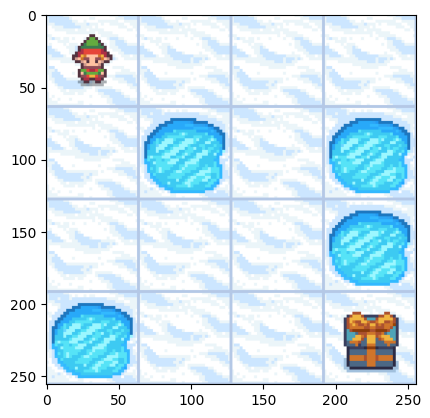

score: 0.0
TRAINED AGENT
Step 2


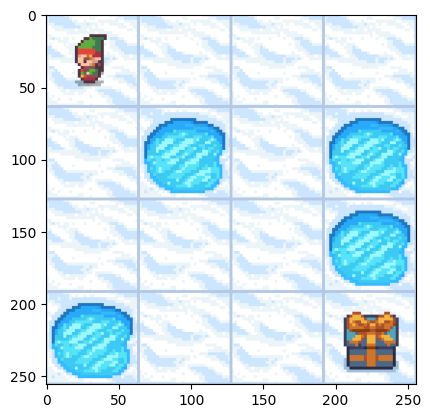

score: 0.0
TRAINED AGENT
Step 3


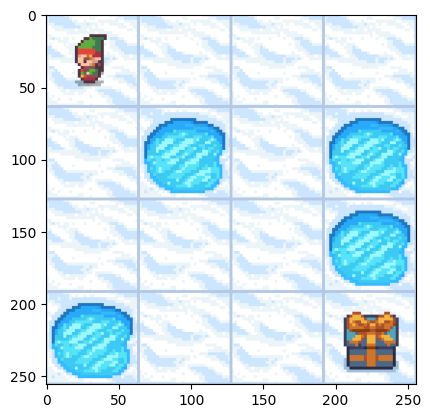

score: 0.0
TRAINED AGENT
Step 4


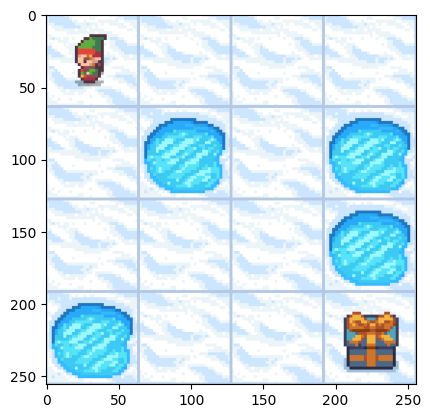

score: 0.0
TRAINED AGENT
Step 5


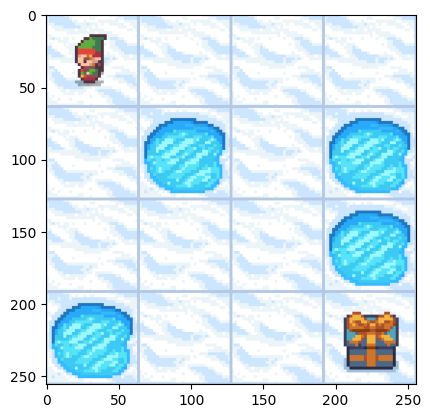

score: 0.0
TRAINED AGENT
Step 6


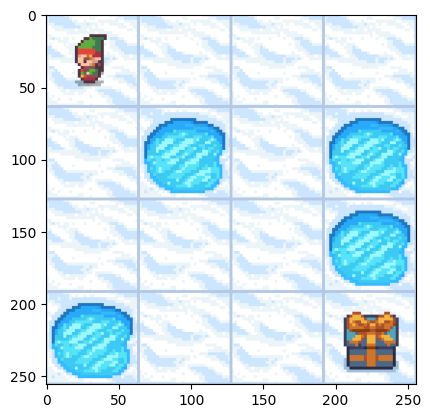

score: 0.0
TRAINED AGENT
Step 7


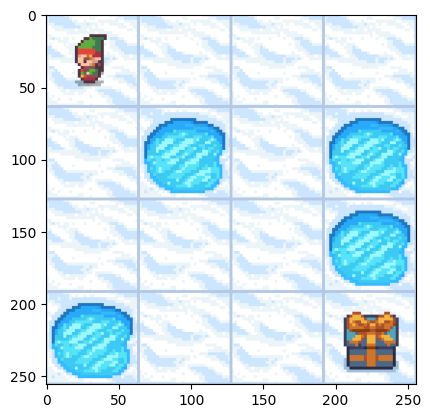

score: 0.0
TRAINED AGENT
Step 8


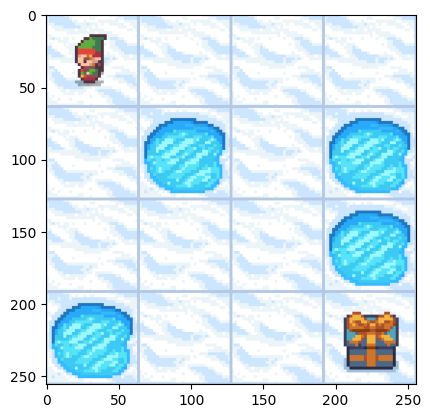

score: 0.0
TRAINED AGENT
Step 9


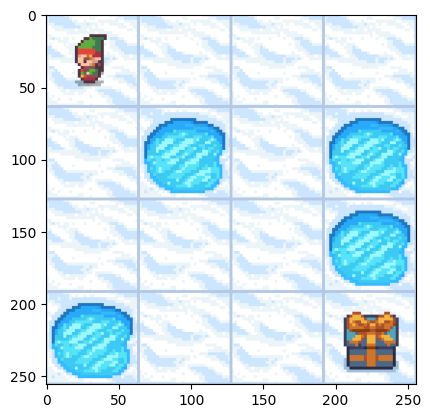

score: 0.0
TRAINED AGENT
Step 10


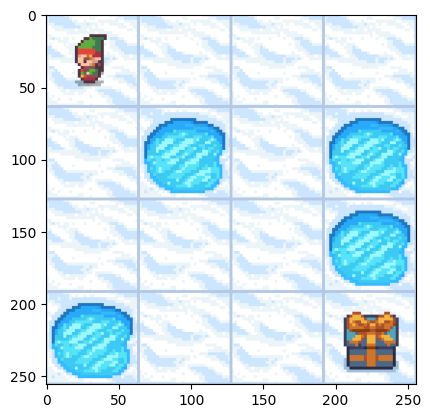

score: 0.0
TRAINED AGENT
Step 11


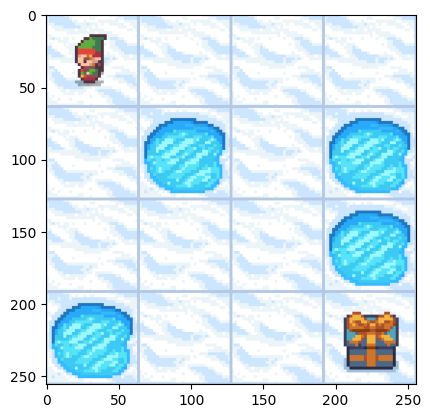

score: 0.0
TRAINED AGENT
Step 12


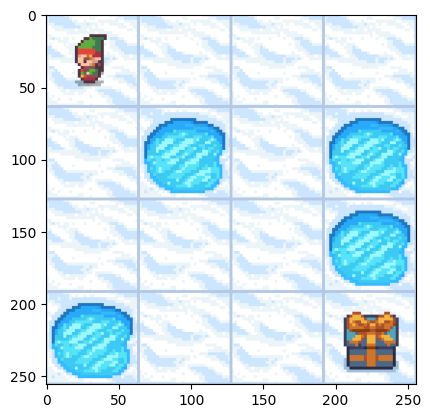

score: 0.0
TRAINED AGENT
Step 13


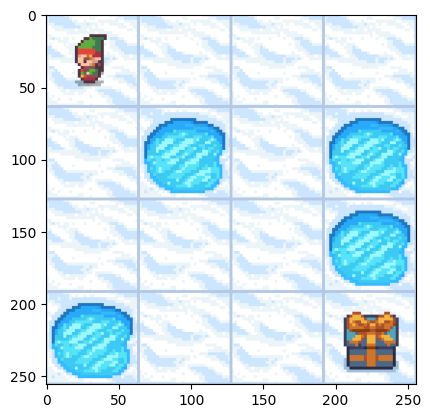

score: 0.0
TRAINED AGENT
Step 14


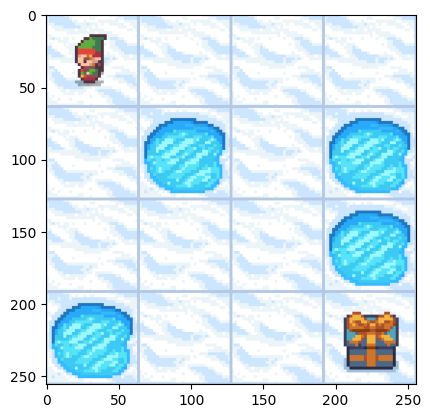

score: 0.0
TRAINED AGENT
Step 15


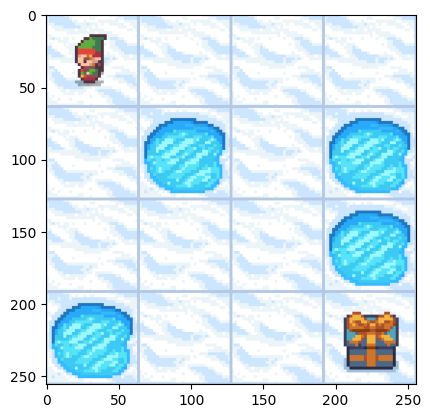

score: 0.0
TRAINED AGENT
Step 16


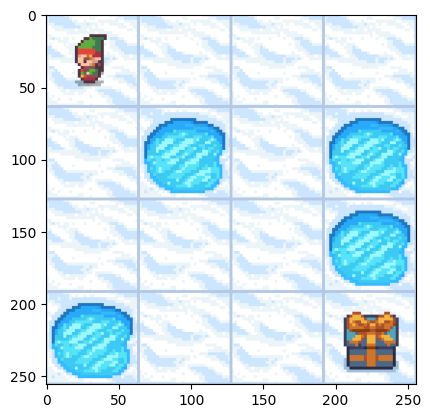

score: 0.0
TRAINED AGENT
Step 17


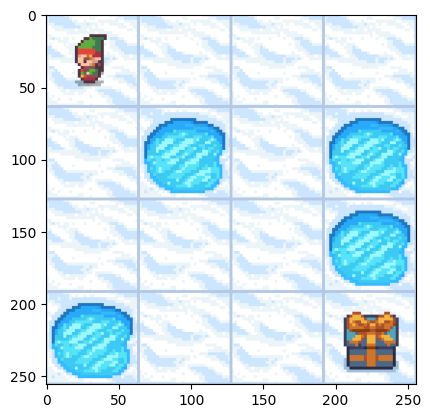

score: 0.0
TRAINED AGENT
Step 18


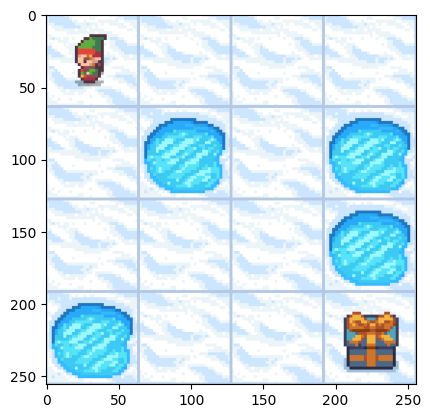

score: 0.0
TRAINED AGENT
Step 19


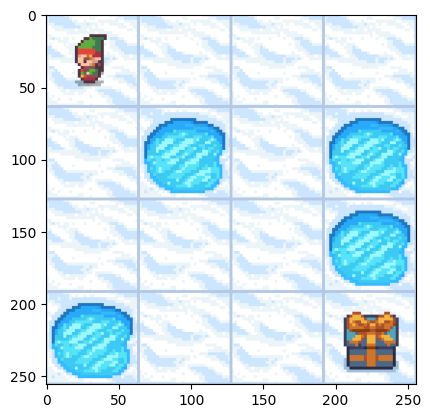

score: 0.0
TRAINED AGENT
Step 20


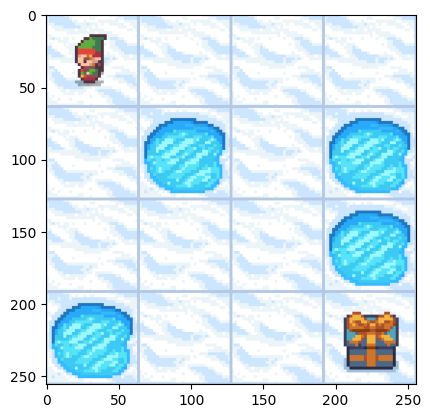

score: 0.0


In [ ]:
# watch trained agent
state = env.reset()
done = False
rewards = 0
max_steps = 20

for s in range(max_steps):

    print(f"TRAINED AGENT")
    print("Step {}".format(s+1))

    action = np.argmax(q_table[state])
    new_state, reward, done, info = env.step(action)
    rewards += reward
    #print(env.render())
    #plt.imshow(env.render())
    plt.imshow(np.squeeze(env.render()[0]))
    plt.show()
    print(f"score: {rewards}")
    state = new_state

    if done == True:
        break

env.close()

9. The agent does not move! Although we know for a fact this is not the optimal behaviour! The problem comes from the fact that we start with a Q-table filled with zeros. That means that at the beginning, the optimal action given by `np.argmax(q_table[state])` is always `0` which lead our agent against the wall. The odds of picking random actions are really low with our chosen policy (e.g. 0.1). In this setting, it becomes almost impossible for the agent to randomly reach the goal (the only non zero reward) and start learning!

Try to think of a solution for this for at least 5 minutes then click the spoiler to get a clue:

<details>
<summary>SPOILER</summary>
The solution is to force the agent to pick a random action whenever the score for all actions are equivalent
</details>

Once you think you have found a way to solve this issue, rerun your adapted training loop.

# **SOLUTION 1 : Explorer davantage en début d'entrainement**

In [ ]:
%%time
# magic command for measuring the cell's exectution time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
#epsilon = 0.1
epsilon = 0.9


# For plotting metrics
all_epochs = []
all_penalties = []

# Loop over a certain number off episodes
for i in range(1, 10001):
    epsilon -= epsilon * 0.0005
    state = env.reset() # start by re-initializing the environment

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done: # starting a while loop that will keep running until the termination of an episode
        # We then define the epsilon greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        # take action and get next state information
        next_state, reward, done, info = env.step(action)

        # update q table using the algorithm formula
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max) # decaying average of the old value and the new estimated value
        q_table[state, action] = new_value

        # update the state variable
        state = next_state
        epochs += 1

    # every 100 episode we print the episode number
    if i % 100 == 0:
        clear_output(wait=True)
        print("[INFO] : Episode {} finished : Steps needed to complete episode : {}".format(i, epochs))

print("Training finished.\n")

[INFO] : Episode 10000 finished : Steps needed to complete episode : 6
Training finished.

CPU times: user 1min 36s, sys: 231 ms, total: 1min 36s
Wall time: 1min 38s


10. Calculate the average reward across 100 episodes

In [ ]:
!pip3 install array2gif

Results after 100 episodes:
Average reward per episode: 1.0


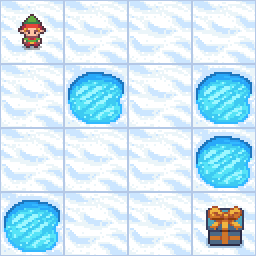

In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100
cumulated_reward = 0

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0

    done = False
    arr = list()

    while not done:
        # this time we use the greedy policy
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        arr.append(env.render()[0])

        cumulated_reward += reward

        epochs += 1

    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average reward per episode: {cumulated_reward / episodes}")

from array2gif import write_gif
arr_rotated = [np.rot90(np.fliplr(arri)) for arri in arr]
write_gif(arr_rotated, 'frozen_lake_4x4_solution1.gif', fps=6)

from IPython.display import Image
Image(open('frozen_lake_4x4_solution1.gif','rb').read())

11. What is the agent doing now? Show its behaviour visually.

# **SOLUTION 2 : Choisir des actions aléatoires lorsque toutes les actions gloutonnes se valent**

In [ ]:
%%time
# magic command for measuring the cell's exectution time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1


# For plotting metrics
all_epochs = []
all_penalties = []

# Loop over a certain number off episodes
for i in range(1, 10001):
    state = env.reset() # start by re-initializing the environment

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done: # starting a while loop that will keep running until the termination of an episode
        # We then define the epsilon greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        elif np.min(q_table[state]) == np.max(q_table[state]):
          action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        # take action and get next state information
        next_state, reward, done, info = env.step(action)

        # update q table using the algorithm formula
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max) # decaying average of the old value and the new estimated value
        q_table[state, action] = new_value

        # update the state variable
        state = next_state
        epochs += 1

    # every 100 episode we print the episode number
    if i % 100 == 0:
        clear_output(wait=True)
        print("[INFO] : Episode {} finished : Steps needed to complete episode : {}".format(i, epochs))

print("Training finished.\n")

[INFO] : Episode 10000 finished : Steps needed to complete episode : 8
Training finished.

CPU times: user 1min 34s, sys: 187 ms, total: 1min 34s
Wall time: 1min 35s


Results after 100 episodes:
Average reward per episode: 1.0


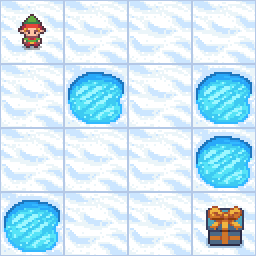

In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100
cumulated_reward = 0

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0

    done = False
    arr = list()

    while not done:
        # this time we use the greedy policy
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        arr.append(env.render()[0])

        cumulated_reward += reward

        epochs += 1

    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average reward per episode: {cumulated_reward / episodes}")

from array2gif import write_gif
arr_rotated = [np.rot90(np.fliplr(arri)) for arri in arr]
write_gif(arr_rotated, 'frozen_lake_4x4_solution2.gif', fps=6)

from IPython.display import Image
Image(open('frozen_lake_4x4_solution2.gif','rb').read())

Yay! The agent is now able to win the game in an optimal way!

## Frozen Lake 8x8

No let's see if we can solve the frozen lake problem with a more challenging map!

1. Setup a Frozen Lake environment with an 8x8 map and not slippery.

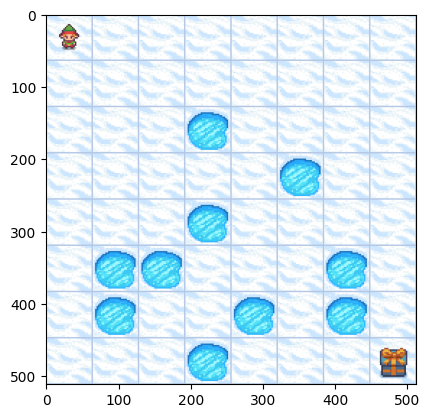

In [ ]:
import gym
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1", desc=None,map_name="8x8", is_slippery=False, render_mode="rgb_array").env
env.reset()
plt.imshow(np.squeeze(env.render()))

2. In this setting, the probability to randomly reach the objective is way thinner, let's see if our training loop has any chance to complete the Q-learning algorithm. Setup the Q table with initial values equal to zero.

In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


3. Run the Q-learning algorithm over 100 000 episodes.

In [ ]:
%%time
# magic command for measuring the cell's exectution time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

# Loop over a certain number off episodes
for i in range(1, 100001):
    state = env.reset() # start by re-initializing the environment

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done: # starting a while loop that will keep running until the termination of an episode
        # We then define the epsilon greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        elif np.min(q_table[state]) == np.max(q_table[state]):
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        # take action and get next state information
        next_state, reward, done, info = env.step(action)

        # update q table using the algorithm formula
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max) # decaying average of the old value and the new estimated value
        q_table[state, action] = new_value

        # update the state variable
        state = next_state
        epochs += 1

    # every 100 episode we print the episode number
    if i % 100 == 0:
        clear_output(wait=True)
        print("[INFO] : Episode {} finished : Steps needed to complete episode : {}".format(i, epochs))

print("Training finished.\n")

[INFO] : Episode 57500 finished : Steps needed to complete episode : 22


4. Visualize the agent's behaviour.

TRAINED AGENT
Step 1


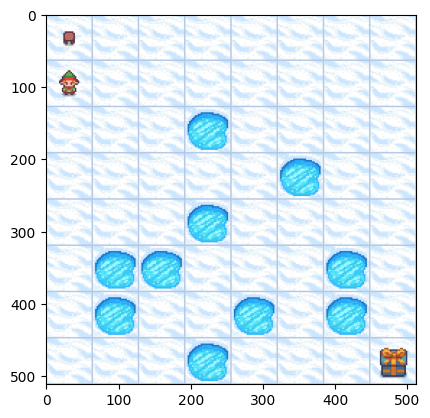

score: 0.0
TRAINED AGENT
Step 2


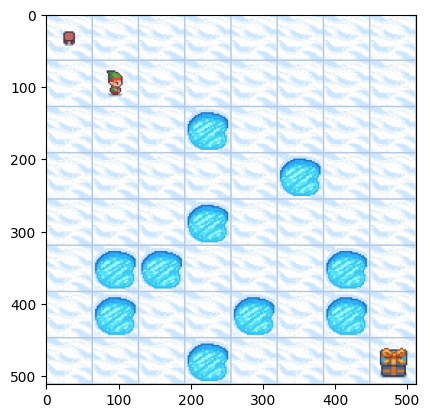

score: 0.0
TRAINED AGENT
Step 3


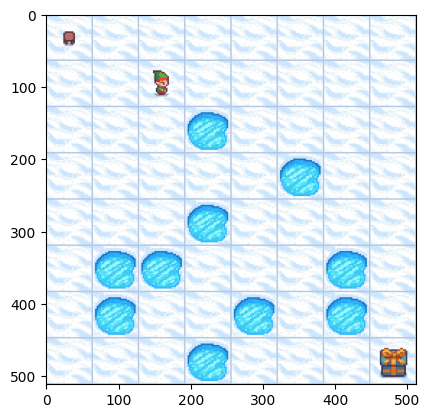

score: 0.0
TRAINED AGENT
Step 4


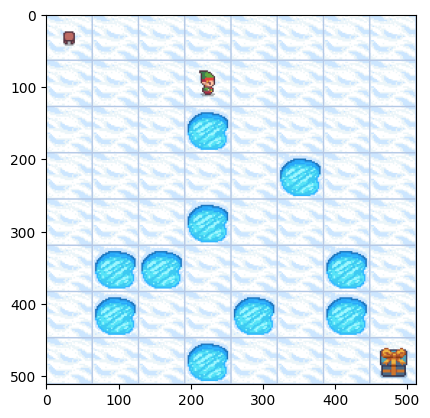

score: 0.0
TRAINED AGENT
Step 5


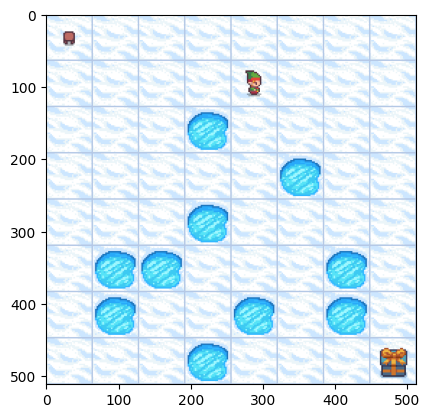

score: 0.0
TRAINED AGENT
Step 6


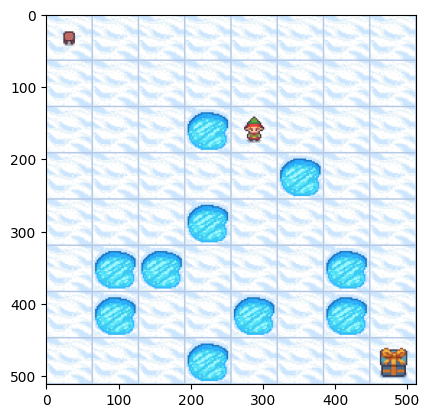

score: 0.0
TRAINED AGENT
Step 7


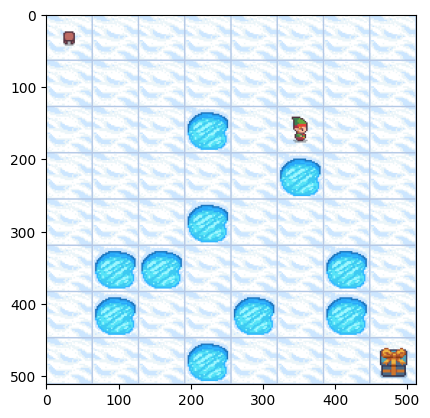

score: 0.0
TRAINED AGENT
Step 8


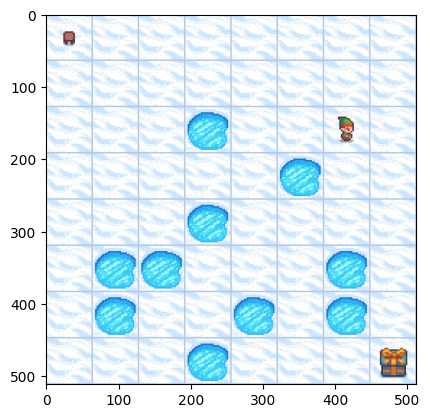

score: 0.0
TRAINED AGENT
Step 9


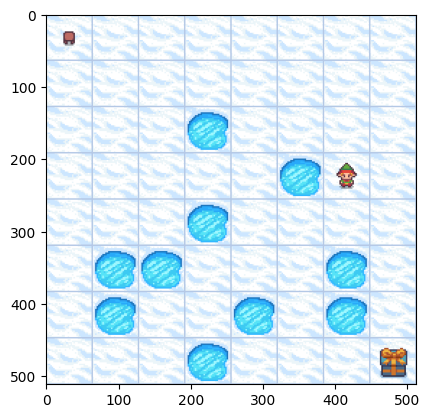

score: 0.0
TRAINED AGENT
Step 10


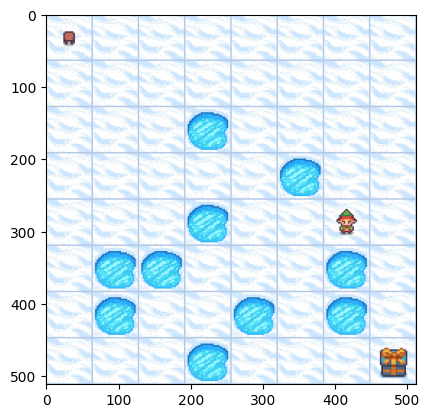

score: 0.0
TRAINED AGENT
Step 11


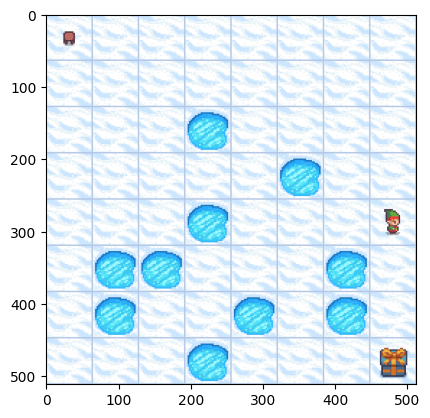

score: 0.0
TRAINED AGENT
Step 12


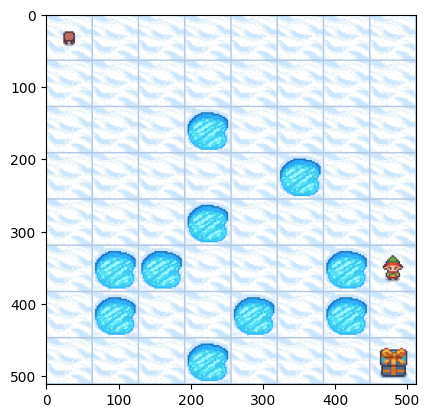

score: 0.0
TRAINED AGENT
Step 13


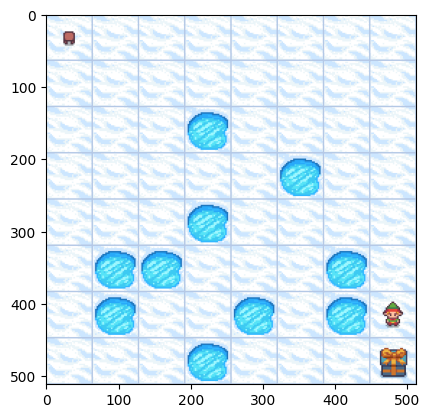

score: 0.0
TRAINED AGENT
Step 14


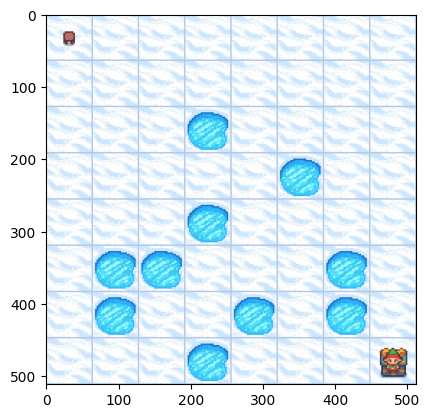

score: 1.0


In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100
cumulated_reward = 0

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0

    done = False
    arr = list()

    while not done:
        # this time we use the greedy policy
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        arr.append(env.render()[0])

        cumulated_reward += reward

        epochs += 1

    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average reward per episode: {cumulated_reward / episodes}")

from array2gif import write_gif
arr_rotated = [np.rot90(np.fliplr(arri)) for arri in arr]
write_gif(arr_rotated, 'frozen_lake_8x8.gif', fps=6)

from IPython.display import Image
Image(open('frozen_lake_8x8.gif','rb').read())

Looks like it reached the goal!

## Slippery Frozen Lake

Now let's complicate things even further by making the lake slippery! This means that whenever you pick an action you have two out of three chances to go lateral instead of going forward (also with one third of a chance). For example if I pick the action "down", the probability of going "down" is $\frac{1}{3}$ the probability of going "left" is $\frac{1}{3}$ and the probability of going "right" is $\frac{1}{3}$.

1. Setup an environment with map 8x8 in slippery mode.

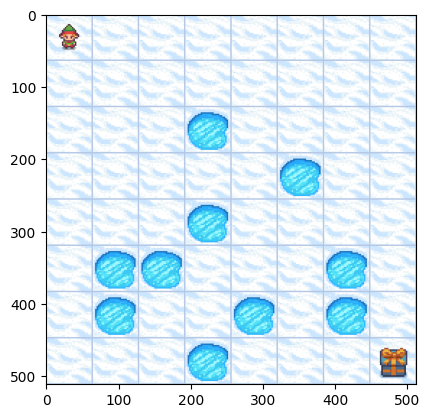

In [ ]:
import gym
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1", desc=None,map_name="8x8", is_slippery=True, render_mode="rgb_array").env
env.reset()
plt.imshow(env.render())

In [ ]:
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 8, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 8, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 8, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 9, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 9, 0.0, False),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 9, 0.0, False),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},


2. Setup the Q table

In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


3. Run the Q learning algorithm over 100 000 episodes

In [ ]:
%%time
# magic command for measuring the cell's exectution time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

# Loop over a certain number off episodes
for i in range(1, 100001):
    state = env.reset()[0] # start by re-initializing the environment

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done: # starting a while loop that will keep running until the termination of an episode
        # We then define the epsilon greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        elif np.min(q_table[state]) == np.max(q_table[state]):
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        # take action and get next state information
        next_state, reward, done, info,_ = env.step(action)

        # update q table using the algorithm formula
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max) # decaying average of the old value and the new estimated value
        q_table[state, action] = new_value

        # update the state variable
        state = next_state
        epochs += 1

    # every 100 episode we print the episode number
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 3min 10s, sys: 11.3 s, total: 3min 21s
Wall time: 3min 31s


4. Visualize what the agent is doing

TRAINED AGENT
Step 1


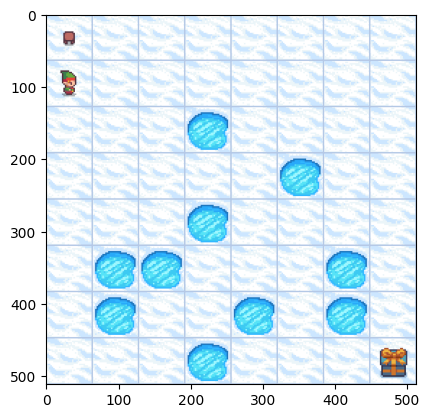

score: 0.0
TRAINED AGENT
Step 2


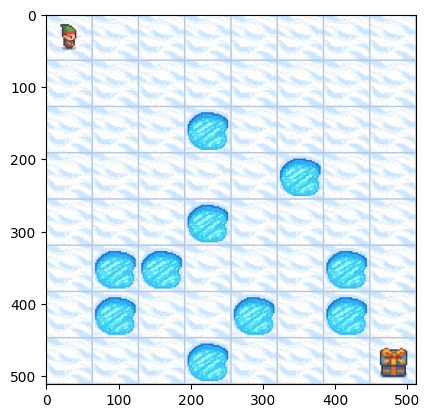

score: 0.0
TRAINED AGENT
Step 3


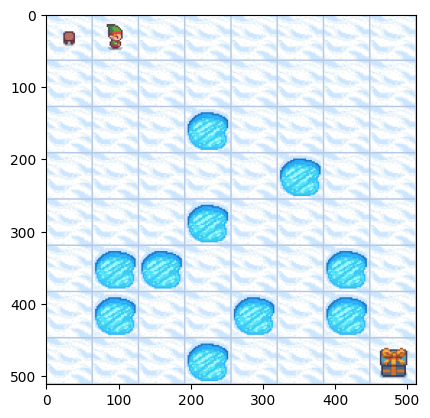

score: 0.0
TRAINED AGENT
Step 4


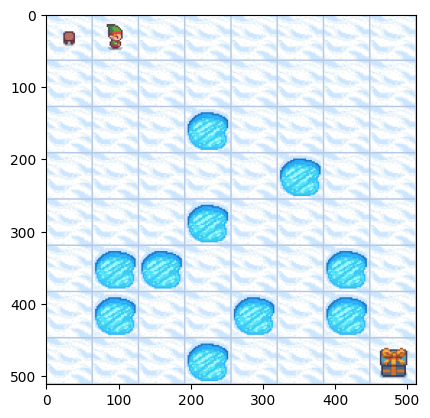

score: 0.0
TRAINED AGENT
Step 5


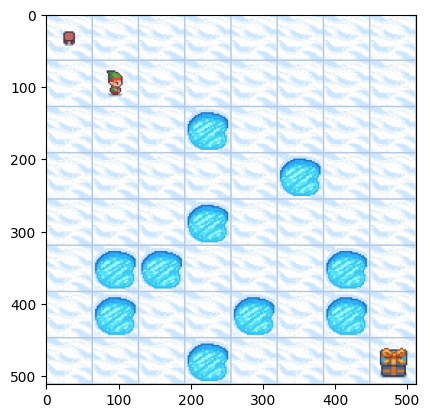

score: 0.0
TRAINED AGENT
Step 6


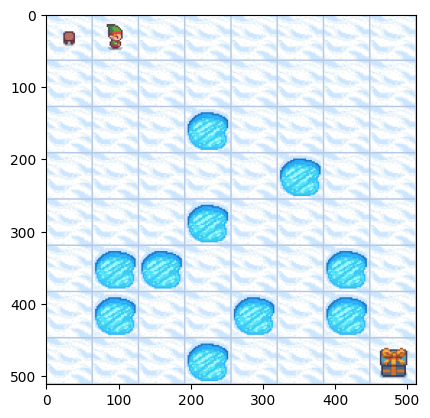

score: 0.0
TRAINED AGENT
Step 7


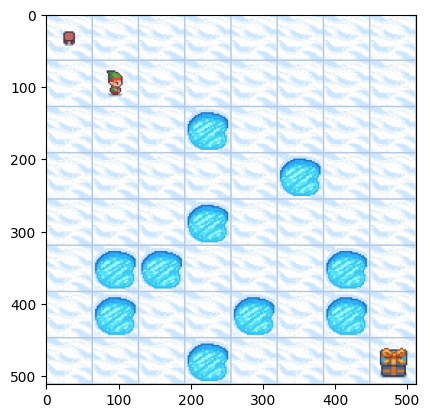

score: 0.0
TRAINED AGENT
Step 8


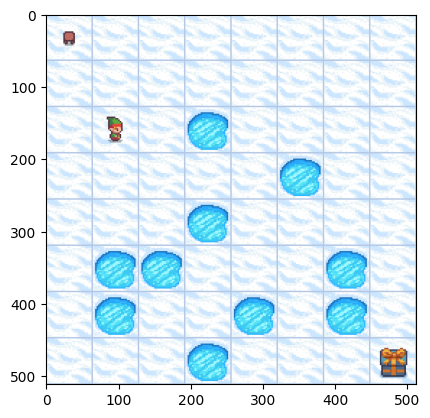

score: 0.0
TRAINED AGENT
Step 9


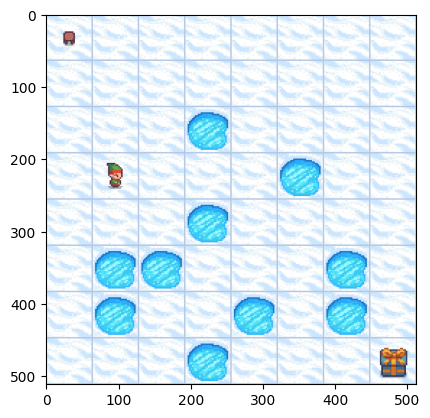

score: 0.0
TRAINED AGENT
Step 10


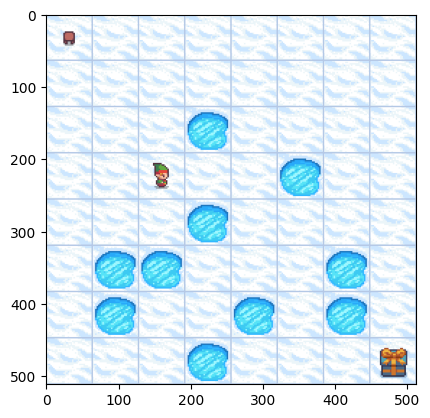

score: 0.0
TRAINED AGENT
Step 11


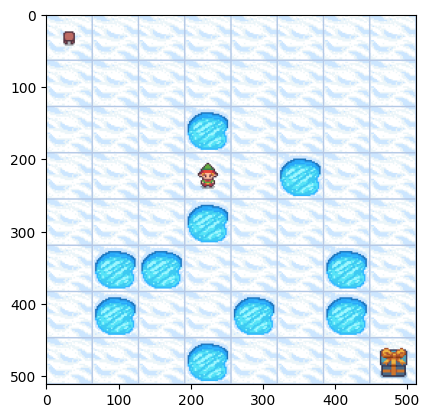

score: 0.0
TRAINED AGENT
Step 12


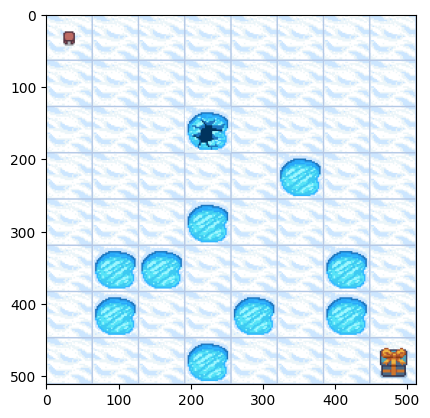

score: 0.0


In [ ]:
# watch trained agent
state = env.reset()[0]
done = False
rewards = 0
max_steps = 100

for s in range(max_steps):

    print(f"TRAINED AGENT")
    print("Step {}".format(s+1))

    action = np.argmax(q_table[state])
    new_state, reward, done, info, _ = env.step(action)
    rewards += reward
    plt.imshow(env.render())
    plt.show()
    print(f"score: {rewards}")
    state = new_state

    if done == True:
        break

env.close()

5. Looks like the agent is moving, let's see what its average reward is across one hundred episodes under the greedy policy.

In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100
cumulated_reward = 0

for i in range(episodes):
    clear_output(wait=True)
    print(i)
    state = env.reset()[0]
    epochs, penalties, reward = 0, 0, 0

    done = False

    while not done:
        # this time we use the greedy policy
        action = np.argmax(q_table[state])
        state, reward, done, info, _ = env.step(action)

        cumulated_reward += reward

        epochs += 1

    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average reward per episode: {cumulated_reward / episodes}")

99
Results after 100 episodes:
Average reward per episode: 0.07


6. The agent has not learned nothing, since it reached the goal in 6% of trials. Is there a way of getting a reward of 1 100% of the time? Try to run the algorithm for 500 000 more steps to see if we improve our score!

In [ ]:
%%time
# magic command for measuring the cell's exectution time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

# Loop over a certain number off episodes
for i in range(1, 500001):
    state = env.reset()[0] # start by re-initializing the environment

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done: # starting a while loop that will keep running until the termination of an episode
        # We then define the epsilon greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        elif np.min(q_table[state]) == np.max(q_table[state]):
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        # take action and get next state information
        next_state, reward, done, info, _ = env.step(action)

        # update q table using the algorithm formula
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max) # decaying average of the old value and the new estimated value
        q_table[state, action] = new_value

        # update the state variable
        state = next_state
        epochs += 1

    # every 100 episode we print the episode number
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 500000
Training finished.

CPU times: user 16min 49s, sys: 53.6 s, total: 17min 43s
Wall time: 18min 43s


In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 1000
cumulated_reward = 0

for i in range(episodes):
    clear_output(wait=True)
    print(i)
    state = env.reset()[0]
    epochs, penalties, reward = 0, 0, 0

    done = False

    while not done:
        # this time we use the greedy policy
        action = np.argmax(q_table[state])
        state, reward, done, info, _ = env.step(action)

        cumulated_reward += reward

        epochs += 1

    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average reward per episode: {cumulated_reward / episodes}")

999
Results after 1000 episodes:
Average reward per episode: 0.039


7. Looks like in this case, more training does not let us win everytime! Try and pick the actions manually to get 100% chance of winning!

In [ ]:
env.reset()

0

In [ ]:
done = False
action = 3
state=0
while done == False:
    if state == 7:
        action = 2
    obs = env.step(action)
    state, reward, done, info,_ = obs
    print(obs)

(0, 0.0, False, {'prob': 0.3333333333333333})
(1, 0.0, False, {'prob': 0.3333333333333333})
(2, 0.0, False, {'prob': 0.3333333333333333})
(3, 0.0, False, {'prob': 0.3333333333333333})
(4, 0.0, False, {'prob': 0.3333333333333333})
(5, 0.0, False, {'prob': 0.3333333333333333})
(4, 0.0, False, {'prob': 0.3333333333333333})
(3, 0.0, False, {'prob': 0.3333333333333333})
(3, 0.0, False, {'prob': 0.3333333333333333})
(3, 0.0, False, {'prob': 0.3333333333333333})
(2, 0.0, False, {'prob': 0.3333333333333333})
(2, 0.0, False, {'prob': 0.3333333333333333})
(1, 0.0, False, {'prob': 0.3333333333333333})
(0, 0.0, False, {'prob': 0.3333333333333333})
(0, 0.0, False, {'prob': 0.3333333333333333})
(0, 0.0, False, {'prob': 0.3333333333333333})
(0, 0.0, False, {'prob': 0.3333333333333333})
(1, 0.0, False, {'prob': 0.3333333333333333})
(0, 0.0, False, {'prob': 0.3333333333333333})
(0, 0.0, False, {'prob': 0.3333333333333333})
(1, 0.0, False, {'prob': 0.3333333333333333})
(2, 0.0, False, {'prob': 0.3333333

It's technically feasible to reach the goal with probability 100% when picking the exact right policy, and even though the Q learning algorithm should ultimately converge to the optimal policy it may be very computationally expensive to get there, even with such a simple problem!

In [ ]:
ACCESSORIES_LIST = ["velo", "fauteuil_roulant"]
NAMES2ID_DICT = {"velo":46, "fauteuil_roulant":192, "bagage":120, "trotinette":129, "poussette":130}
CLASSES = list(NAMES2ID_DICT.values())
CLASSES

[46, 192, 120, 129, 130]